**Проект 2. Разведывательный анализ данных**   
выполнил: Закиров Наиль (DST-53)  
2021-04-07

In [196]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import re

from itertools import combinations
from scipy.stats import ttest_ind

In [197]:
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок



In [198]:
students = pd.read_csv('stud_math.csv')

In [199]:
display(students.head(10))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [200]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

In [201]:
# удалим столбец 'studytime, granular'
students = students.drop('studytime, granular', 1)

In [202]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       378 non-null object
famsize       368 non-null object
Pstatus       350 non-null object
Medu          392 non-null float64
Fedu          371 non-null float64
Mjob          376 non-null object
Fjob          359 non-null object
reason        378 non-null object
guardian      364 non-null object
traveltime    367 non-null float64
studytime     388 non-null float64
failures      373 non-null float64
schoolsup     386 non-null object
famsup        356 non-null object
paid          355 non-null object
activities    381 non-null object
nursery       379 non-null object
higher        375 non-null object
internet      361 non-null object
romantic      364 non-null object
famrel        368 non-null float64
freetime      384 non-null float64
goout         387 non-null float64
heal

In [203]:
students.isna().any()

school        False
sex           False
age           False
address        True
famsize        True
Pstatus        True
Medu           True
Fedu           True
Mjob           True
Fjob           True
reason         True
guardian       True
traveltime     True
studytime      True
failures       True
schoolsup      True
famsup         True
paid           True
activities     True
nursery        True
higher         True
internet       True
romantic       True
famrel         True
freetime       True
goout          True
health         True
absences       True
score          True
dtype: bool

## Тепловая карта пропущенных значений

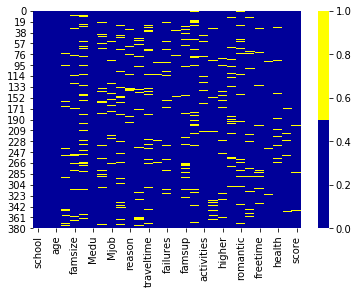

In [204]:
cols = students.columns 
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(students[cols].isnull(), cmap=sns.color_palette(colours))

### Процентный список пропущенных данных

In [205]:
for col in students.columns:
    pct_missing = np.mean(students[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

school - 0.0%
sex - 0.0%
age - 0.0%
address - 4.0%
famsize - 7.0%
Pstatus - 11.0%
Medu - 1.0%
Fedu - 6.0%
Mjob - 5.0%
Fjob - 9.0%
reason - 4.0%
guardian - 8.0%
traveltime - 7.0%
studytime - 2.0%
failures - 6.0%
schoolsup - 2.0%
famsup - 10.0%
paid - 10.0%
activities - 4.0%
nursery - 4.0%
higher - 5.0%
internet - 9.0%
romantic - 8.0%
famrel - 7.0%
freetime - 3.0%
goout - 2.0%
health - 4.0%
absences - 3.0%
score - 2.0%


### Поиск отсутствующих значений в записях

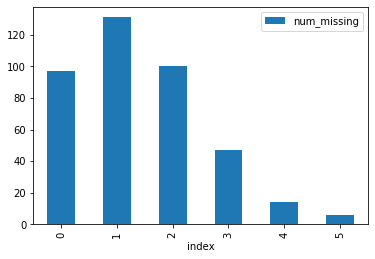

In [206]:
students_miss = pd.DataFrame()
for col in students.columns:
    missing = students[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        #print('created missing indicator for: {}'.format(col))
        students_miss['{}_ismissing'.format(col)] = missing


# затем на основе индикатора строим гистограмму
ismissing_cols = [col for col in students_miss.columns if 'ismissing' in col]
students_miss['num_missing'] = students_miss[ismissing_cols].sum(axis=1)

students_miss['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

In [207]:
students_miss.num_missing.value_counts()


1    131
2    100
0     97
3     47
4     14
5      6
Name: num_missing, dtype: int64

In [208]:
numeric_cols = students.select_dtypes(include=[np.number]).columns.values
numeric_cols

array(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'health', 'absences', 'score'],
      dtype=object)

In [209]:
non_numeric_cols = students.select_dtypes(exclude=[np.number]).columns.values
non_numeric_cols

array(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'], dtype=object)

**Опишем функции для обрабокти пропущенных значений и выбросов.**

In [210]:
def null_numeric_processing(df, col, drop=False, value=''):
    if drop:
        df.dropna(subset=[col], inplace=True)
    else:
        if value == '':
            missing = df[col].isnull()
            num_missing = np.sum(missing)

            if num_missing > 0:
                #print('imputing missing values for: {}'.format(col))
                #df['{}_ismissing'.format(col)] = missing
                med = df[col].median()
                df[col] = df[col].fillna(med)
                return med
        else:
            df[col] = df[col].fillna(value)

In [211]:
def null_non_numeric_processing(df, col, drop=False, value=''):
    if drop:
        df.dropna(subset=[col], inplace=True)
    else:
        if value == '':
            missing = df[col].isnull()
            num_missing = np.sum(missing)

            if num_missing > 0:  # only do the imputation for the columns that have missing values.
                top = df[col].describe()['top'] # impute with the most frequent value.
                df[col] = df[col].fillna(top)
                return top
        else:
            df[col] = df[col].fillna(value)

In [212]:
def outliers_processing(df, col, min_value='', max_value='', value='', drop=False):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    if min_value != '':
        lower_limit = min_value
    if max_value != '':
        upper_limit = max_value
    outliers_count = df[col][(df[col] < lower_limit) | (df[col] > upper_limit)].count()
    if value != '':
        df[col] = df[col].apply(lambda x: value if x >
                                upper_limit or x < lower_limit else x)
    if drop:
        df.drop(df[(df[col] < lower_limit) | (df[col] > upper_limit)].index, inplace=True)
    return outliers_count

In [213]:
def to_binary(df, col, value):
    df[col] = df[col].apply(lambda x: 1 if x == value else 0)

## school

In [214]:
students.school.value_counts()

GP    349
MS     46
Name: school, dtype: int64

## sex


In [215]:
students.sex.value_counts()

F    208
M    187
Name: sex, dtype: int64

### age


Столбец числовой и без пропусков. Посмотрим на его распределение.

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

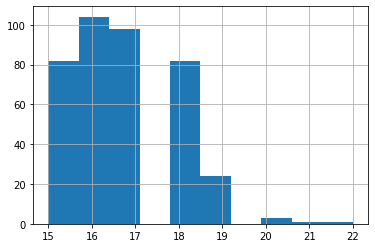

In [216]:
students.age.hist()
students.age.describe()

Как видно, у этого признака распределение без аномалий, выбросов нет.

## address

In [217]:
students.address.value_counts(dropna=False)

U      295
R       83
NaN     17
Name: address, dtype: int64

Удалим записи с пустыми значениями


In [218]:
null_non_numeric_processing(students, 'address', drop=True)

In [219]:
students.address.value_counts(dropna=False)

U    295
R     83
Name: address, dtype: int64

## famsize

In [220]:
students.famsize.value_counts(dropna=False)

GT3    251
LE3    101
NaN     26
Name: famsize, dtype: int64

Удалим записи с пустыми значениями

In [221]:
null_non_numeric_processing(students, 'famsize', drop=True)

In [222]:
to_binary(students, 'famsize', 'GT3')
students.famsize.value_counts(dropna=False)

1    251
0    101
Name: famsize, dtype: int64

## Pstatus


In [191]:
students.Pstatus.value_counts(dropna=False)

T      300
NaN     44
A       34
Name: Pstatus, dtype: int64

## Medu

count    350.000000
mean       2.748571
std        1.096849
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

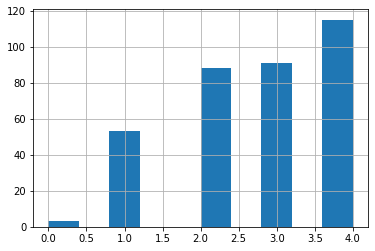

In [132]:
#Столбец числовой, посмотрим на его распределение
students.Medu.hist()
students.Medu.describe()

In [133]:
students.Medu.value_counts(dropna=False)

4.0    115
3.0     91
2.0     88
1.0     53
0.0      3
NaN      2
Name: Medu, dtype: int64

Выбросов не наблюдаем.

In [134]:
# Заменим пустые значения на медиану
null_numeric_processing(students, 'Medu')

3.0

In [135]:
students.Medu.value_counts(dropna=False)

4.0    115
3.0     93
2.0     88
1.0     53
0.0      3
Name: Medu, dtype: int64

count    352.000000
mean       2.750000
std        1.093884
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

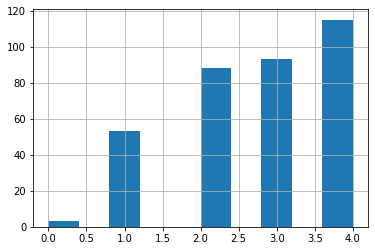

In [136]:
students.Medu.hist()
students.Medu.describe()

## Fedu

In [137]:
students.Fedu.value_counts(dropna=False)

2.0     96
3.0     88
4.0     81
1.0     64
NaN     21
0.0      1
40.0     1
Name: Fedu, dtype: int64

В выборке присутствует выброс, который является скорее всего ошибкой ввода. 

In [138]:
# Заменим все пустые значения на медиану.
null_numeric_processing(students, 'Fedu')

3.0

In [139]:
# Удалим выброс
outliers_processing(students, 'Fedu', min_value=0, max_value=4, drop=True)

1

3.0    109
2.0     96
4.0     81
1.0     64
0.0      1
Name: Fedu, dtype: int64

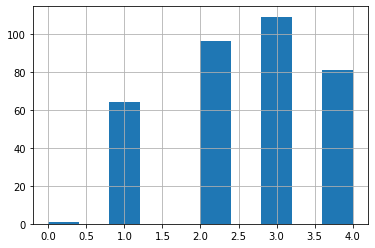

In [140]:
students.Fedu.hist()
students.Fedu.value_counts()

## Mjob

In [141]:
students.Mjob.value_counts(dropna=False)

other       119
services     90
at_home      50
teacher      48
health       27
NaN          17
Name: Mjob, dtype: int64

In [142]:
#Заменим пропуски на наиболее распространенное значение:
null_non_numeric_processing(students, 'Mjob')
students.Mjob.value_counts(dropna=False)

other       136
services     90
at_home      50
teacher      48
health       27
Name: Mjob, dtype: int64

## Fjob

In [143]:
students.Fjob.value_counts(dropna=False)

other       169
services     92
NaN          35
teacher      27
health       15
at_home      13
Name: Fjob, dtype: int64

In [144]:
#Заменим пропуски на наиболее распространенное значение:
null_non_numeric_processing(students, 'Fjob')
students.Fjob.value_counts(dropna=False)

other       204
services     92
teacher      27
health       15
at_home      13
Name: Fjob, dtype: int64

## reason



In [145]:
students.reason.value_counts(dropna=False)

course        121
reputation     91
home           90
other          32
NaN            17
Name: reason, dtype: int64

In [146]:
#Заменим записи с пропусками на значение 'other':
null_non_numeric_processing(students, 'reason', value='other')
students.reason.value_counts(dropna=False)

course        121
reputation     91
home           90
other          49
Name: reason, dtype: int64

## guardian

In [147]:
students.guardian.value_counts(dropna=False)

mother    220
father     78
NaN        28
other      25
Name: guardian, dtype: int64

In [148]:
#Заменим пропуски на 'other':
null_non_numeric_processing(students, 'guardian', value='other')
students.guardian.value_counts(dropna=False)

mother    220
father     78
other      53
Name: guardian, dtype: int64

## traveltime


count    327.000000
mean       1.422018
std        0.682295
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

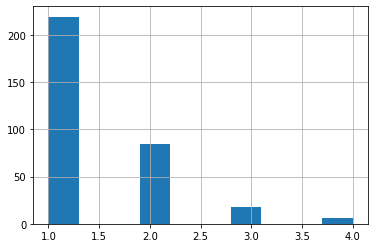

In [149]:
#Столбец числовой, посмотрим на его распределение
students.traveltime.hist()
students.traveltime.describe()


Выбросов нет.

In [150]:
students.traveltime.value_counts(dropna=False)

1.0    219
2.0     84
NaN     24
3.0     18
4.0      6
Name: traveltime, dtype: int64

In [151]:
# Заменим пустые значения на медиану.
null_numeric_processing(students, 'traveltime')
students.traveltime.value_counts(dropna=False)

1.0    243
2.0     84
3.0     18
4.0      6
Name: traveltime, dtype: int64

count    351.000000
mean       1.393162
std        0.667069
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

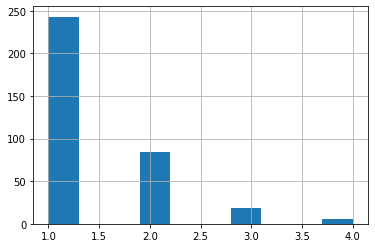

In [152]:
students.traveltime.hist()
students.traveltime.describe()


## studytime

count    345.000000
mean       2.040580
std        0.854931
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

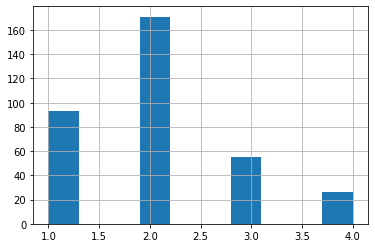

In [153]:
#Столбец числовой, посмотрим на его распределение
students.studytime.hist()
students.studytime.describe()


Выбросов нет.

In [154]:
students.studytime.value_counts(dropna=False)

2.0    171
1.0     93
3.0     55
4.0     26
NaN      6
Name: studytime, dtype: int64

In [155]:
# Заменим пустые значения на медиану.
null_numeric_processing(students, 'studytime')
students.studytime.value_counts(dropna=False)

2.0    177
1.0     93
3.0     55
4.0     26
Name: studytime, dtype: int64

## failures

count    333.000000
mean       0.324324
std        0.730104
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

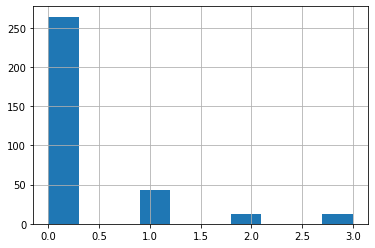

In [156]:
#Столбец числовой, посмотрим на его распределение
students.failures.hist()
students.failures.describe()

In [157]:
students.failures.value_counts(dropna=False)

0.0    264
1.0     43
NaN     18
2.0     13
3.0     13
Name: failures, dtype: int64

In [158]:
# Заменим пустые значения на медиану.
null_numeric_processing(students, 'failures')
students.failures.value_counts(dropna=False)

0.0    282
1.0     43
2.0     13
3.0     13
Name: failures, dtype: int64

## schoolsup

In [159]:
students.schoolsup.value_counts(dropna=False)

no     297
yes     46
NaN      8
Name: schoolsup, dtype: int64

In [160]:
# Удалим записи с пустыми значениями
null_non_numeric_processing(students, 'schoolsup', drop=True)
students.schoolsup.value_counts(dropna=False)

no     297
yes     46
Name: schoolsup, dtype: int64

## famsup

In [161]:
students.famsup.value_counts(dropna=False)

yes    193
no     119
NaN     31
Name: famsup, dtype: int64

In [162]:
# Удалим записи с пустыми значениями
null_non_numeric_processing(students, 'famsup', drop=True)
students.famsup.value_counts(dropna=False)

yes    193
no     119
Name: famsup, dtype: int64

In [163]:
yes_no_to_num(students, 'famsup')

In [164]:
students.famsup.value_counts(dropna=False)

1    193
0    119
Name: famsup, dtype: int64

## paid

In [57]:
students.paid.value_counts(dropna=False)

no     153
yes    125
NaN     34
Name: paid, dtype: int64

In [58]:
# Удалим записи с пустыми значениями
null_non_numeric_processing(students, 'paid', drop=True)
students.paid.value_counts(dropna=False)

no     153
yes    125
Name: paid, dtype: int64

## activities

In [59]:
students.activities.value_counts(dropna=False)

yes    135
no     130
NaN     13
Name: activities, dtype: int64

In [60]:
# Удалим записи с пустыми значениями
null_non_numeric_processing(students, 'activities', drop=True)
students.activities.value_counts(dropna=False)

yes    135
no     130
Name: activities, dtype: int64

## nursery

In [61]:
students.nursery.value_counts(dropna=False)

yes    200
no      55
NaN     10
Name: nursery, dtype: int64

In [62]:
# Удалим записи с пустыми значениями
null_non_numeric_processing(students, 'nursery', drop=True)
students.nursery.value_counts(dropna=False)

yes    200
no      55
Name: nursery, dtype: int64

## higher


In [63]:
students.higher.value_counts(dropna=False)

yes    230
NaN     16
no       9
Name: higher, dtype: int64

In [64]:
# Удалим записи с пустыми значениями
null_non_numeric_processing(students, 'higher', drop=True)
students.higher.value_counts(dropna=False)

yes    230
no       9
Name: higher, dtype: int64

## internet

In [65]:
students.internet.value_counts(dropna=False)

yes    182
no      30
NaN     27
Name: internet, dtype: int64

In [66]:
# Удалим записи с пустыми значениями
null_non_numeric_processing(students, 'internet', drop=True)
students.internet.value_counts(dropna=False)

yes    182
no      30
Name: internet, dtype: int64

## romantic

In [67]:
students.romantic.value_counts(dropna=False)

no     123
yes     72
NaN     17
Name: romantic, dtype: int64

In [68]:
# Удалим записи с пустыми значениями
null_non_numeric_processing(students, 'romantic', drop=True)
students.romantic.value_counts(dropna=False)

no     123
yes     72
Name: romantic, dtype: int64

## famrel


count    182.000000
mean       3.868132
std        0.988428
min       -1.000000
25%        3.250000
50%        4.000000
75%        4.000000
max        5.000000
Name: famrel, dtype: float64

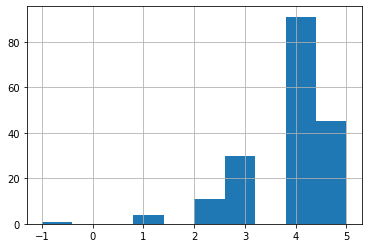

In [69]:
#Столбец числовой, посмотрим на его распределение
students.famrel.hist()
students.famrel.describe()

In [70]:
students.famrel.value_counts(dropna=False)

 4.0    91
 5.0    45
 3.0    30
 NaN    13
 2.0    11
 1.0     4
-1.0     1
Name: famrel, dtype: int64

In [71]:
# Заменим пустые значения на медиану, удалим записи с выбросами.
null_numeric_processing(students, 'famrel')
outliers_processing(students, 'famrel', min_value=1, max_value=5, drop=True)
students.famrel.value_counts(dropna=False)


4.0    104
5.0     45
3.0     30
2.0     11
1.0      4
Name: famrel, dtype: int64

count    194.000000
mean       3.902062
std        0.890768
min        1.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: famrel, dtype: float64

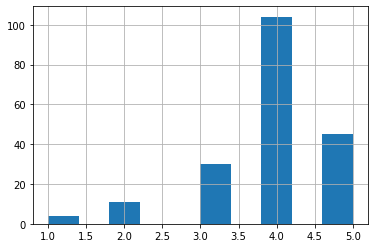

In [72]:
students.famrel.hist()
students.famrel.describe()

## freetime

count    188.000000
mean       3.164894
std        0.997023
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

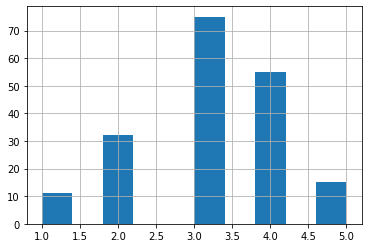

In [73]:
#Столбец числовой, посмотрим на его распределение
students.freetime.hist()
students.freetime.describe()

In [74]:
students.freetime.value_counts(dropna=False)

3.0    75
4.0    55
2.0    32
5.0    15
1.0    11
NaN     6
Name: freetime, dtype: int64

In [75]:
# Заменим пустые значения на медиану.
null_numeric_processing(students, 'freetime')
students.freetime.value_counts(dropna=False)

3.0    81
4.0    55
2.0    32
5.0    15
1.0    11
Name: freetime, dtype: int64

count    194.000000
mean       3.159794
std        0.981820
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

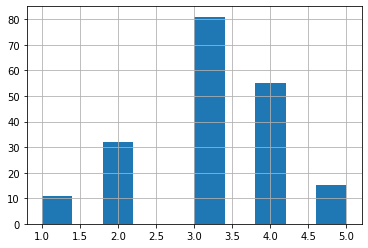

In [76]:
students.freetime.hist()
students.freetime.describe()

## goout

count    191.000000
mean       3.162304
std        1.071076
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

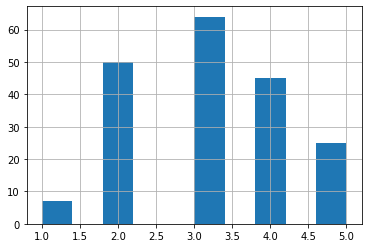

In [77]:
#Столбец числовой, посмотрим на его распределение
students.goout.hist()
students.goout.describe()

In [78]:
students.goout.value_counts(dropna=False)

3.0    64
2.0    50
4.0    45
5.0    25
1.0     7
NaN     3
Name: goout, dtype: int64

In [79]:
# Заменим пустые значения на медиану.
null_numeric_processing(students, 'goout')
students.goout.value_counts(dropna=False)

3.0    67
2.0    50
4.0    45
5.0    25
1.0     7
Name: goout, dtype: int64

count    194.000000
mean       3.159794
std        1.062908
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

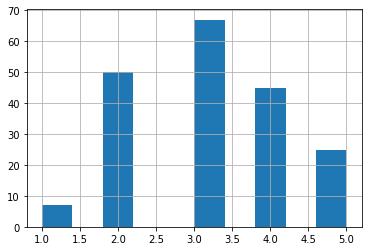

In [80]:
students.goout.hist()
students.goout.describe()

## health

count    187.000000
mean       3.465241
std        1.403766
min        1.000000
25%        2.500000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

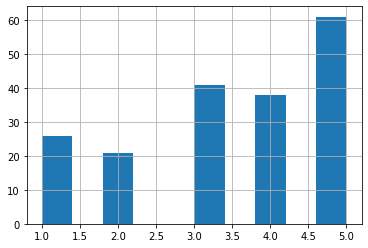

In [81]:
#Столбец числовой, посмотрим на его распределение
students.health.hist()
students.health.describe()

In [82]:
students.health.value_counts(dropna=False)

5.0    61
3.0    41
4.0    38
1.0    26
2.0    21
NaN     7
Name: health, dtype: int64

In [83]:
# Заменим пустые значения на медиану.
null_numeric_processing(students, 'health')
students.health.value_counts(dropna=False)

5.0    61
4.0    45
3.0    41
1.0    26
2.0    21
Name: health, dtype: int64

count    194.000000
mean       3.484536
std        1.381697
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

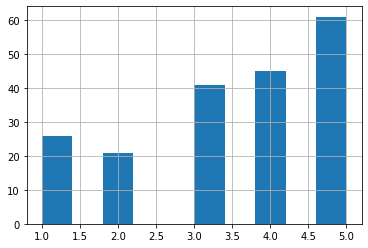

In [84]:
students.health.hist()
students.health.describe()

## absences

count    188.000000
mean       7.042553
std       17.231928
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      212.000000
Name: absences, dtype: float64

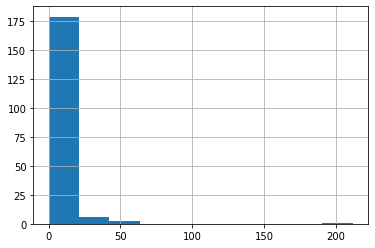

In [85]:
#Столбец числовой, посмотрим на его распределение
students.absences.hist()
students.absences.describe()

In [86]:
students.absences.value_counts(dropna=False)

0.0      55
4.0      27
2.0      24
6.0      16
8.0       9
10.0      9
NaN       6
3.0       5
5.0       4
16.0      4
7.0       4
14.0      4
9.0       3
1.0       3
18.0      3
20.0      2
12.0      2
15.0      2
22.0      2
212.0     1
54.0      1
26.0      1
17.0      1
28.0      1
13.0      1
21.0      1
38.0      1
40.0      1
56.0      1
Name: absences, dtype: int64

In [87]:
# Заменим пустые значения на медиану, удалим записи с выбросами.
null_numeric_processing(students, 'absences')
outliers_processing(students, 'absences', drop=True)
students.absences.value_counts(dropna=False)

0.0     55
4.0     33
2.0     24
6.0     16
8.0      9
10.0     9
3.0      5
16.0     4
5.0      4
14.0     4
7.0      4
18.0     3
1.0      3
9.0      3
12.0     2
15.0     2
20.0     2
13.0     1
17.0     1
Name: absences, dtype: int64

count    184.000000
mean       4.505435
std        4.849649
min        0.000000
25%        0.000000
50%        4.000000
75%        6.000000
max       20.000000
Name: absences, dtype: float64

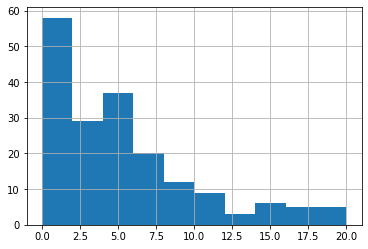

In [88]:
students.absences.hist()
students.absences.describe()

## score

count    182.000000
mean      53.214286
std       23.981420
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

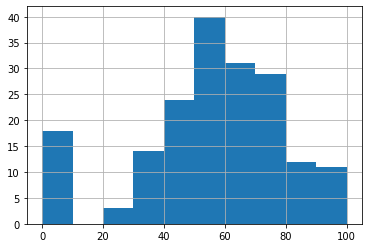

In [89]:
#Столбец числовой, посмотрим на его распределение
students.score.hist()
students.score.describe()

In [90]:
students.score.value_counts(dropna=False)

50.0     21
55.0     19
0.0      18
75.0     16
65.0     16
60.0     15
40.0     14
70.0     13
45.0     10
80.0      8
30.0      7
35.0      7
90.0      6
95.0      4
85.0      4
25.0      3
NaN       2
100.0     1
Name: score, dtype: int64

In [91]:
# Удалим пустые значения.
null_numeric_processing(students, 'score', drop=True)
outliers_processing(students, 'score', drop=True)
students.score.value_counts(dropna=False)

50.0     21
55.0     19
0.0      18
65.0     16
75.0     16
60.0     15
40.0     14
70.0     13
45.0     10
80.0      8
35.0      7
30.0      7
90.0      6
85.0      4
95.0      4
25.0      3
100.0     1
Name: score, dtype: int64

In [92]:
len(students)

182

### Поиск неиформативных признаков

In [98]:
num_rows = len(students.index)
low_information_cols = [] #

for col in students.columns:
    cnts = students[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    #print(top_pct)
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)

higher: 95.60440%
yes    174
no       8
Name: higher, dtype: int64


In [99]:
# удалим столбец 'higher', как неинформативный
students = students.drop('higher', 1)

## Корреляционный анализ

Выясним, какие столбцы коррелируют. Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить.

Корреляции рассмотрим только для числовых столбцов.



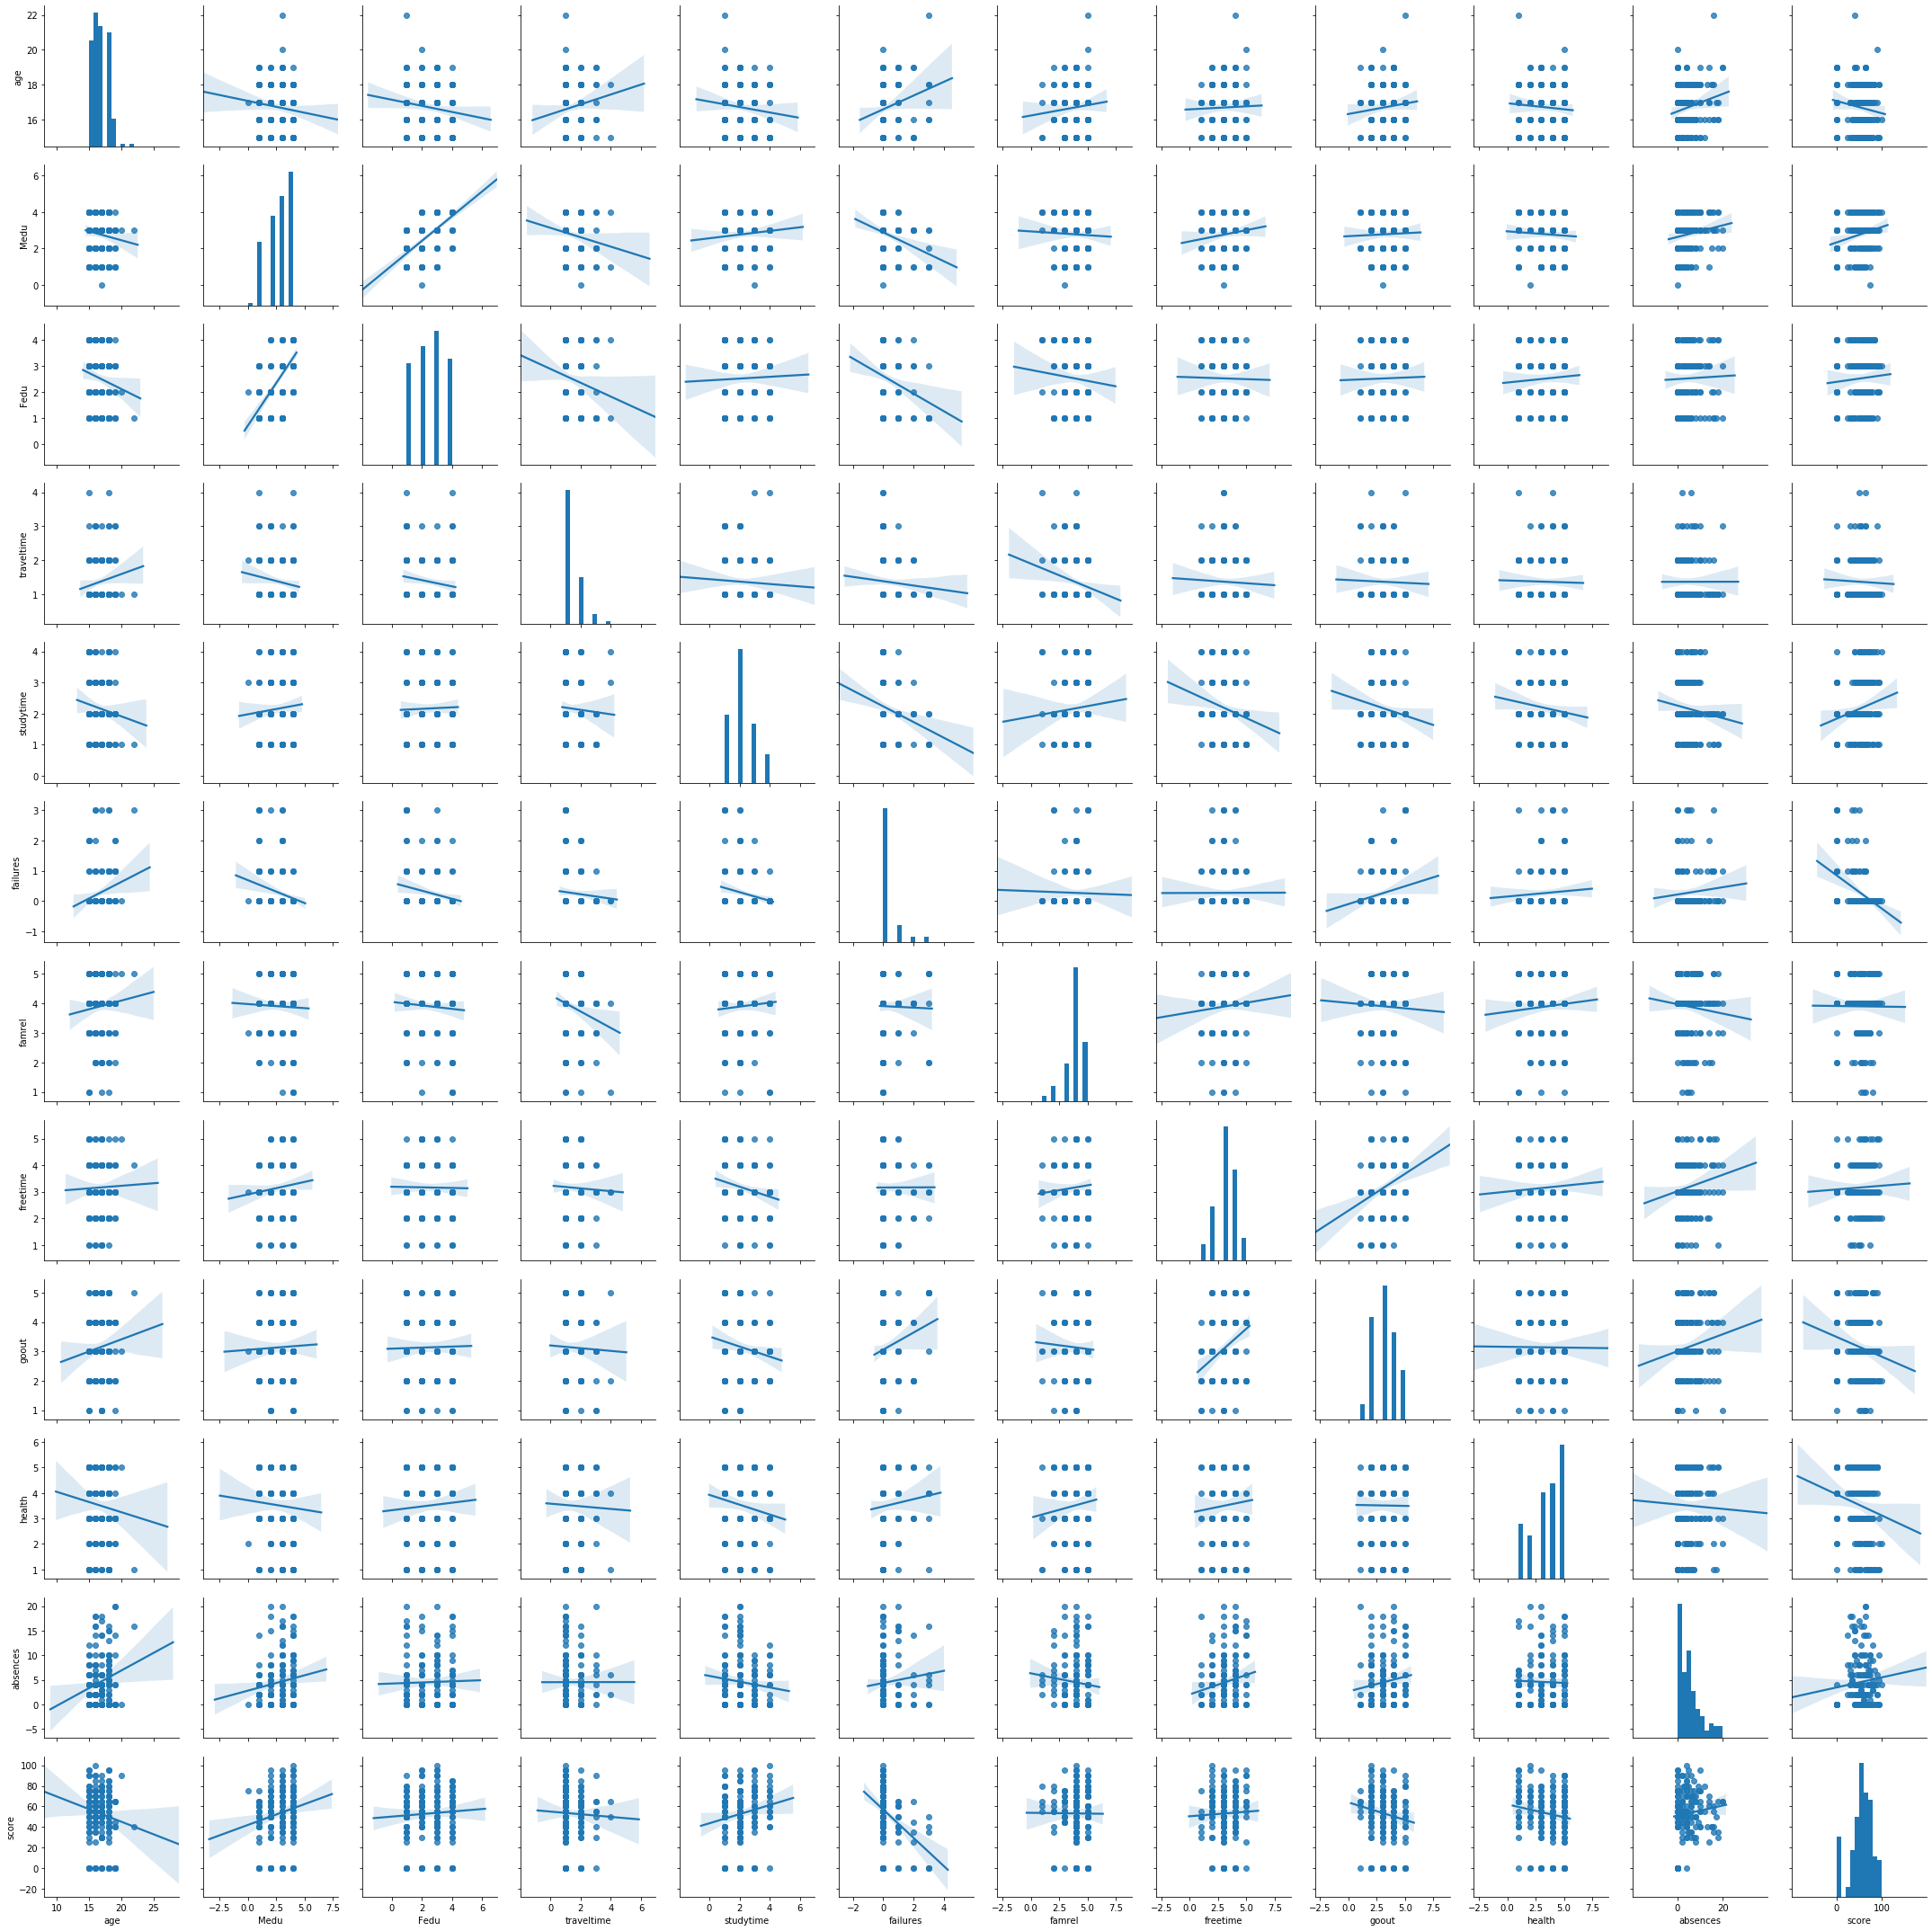

In [101]:
sns.pairplot(students, kind = 'reg')

In [102]:
students.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.115299,-0.146804,0.139626,-0.109486,0.207467,0.083502,0.025868,0.099147,-0.074426,0.189886,-0.131563
Medu,-0.115299,1.000000,0.664438,-0.148582,0.082471,-0.243990,-0.033703,0.107872,0.031345,-0.058514,0.140931,0.185206
Fedu,-0.146804,0.664438,1.000000,-0.156102,0.028563,-0.212283,-0.070439,-0.013161,0.017721,0.057396,0.025110,0.055320
traveltime,0.139626,-0.148582,-0.156102,1.000000,-0.050414,-0.068048,-0.195458,-0.034897,-0.027347,-0.023662,0.000690,-0.034039
studytime,-0.109486,0.082471,0.028563,-0.050414,1.000000,-0.189856,0.067511,-0.177601,-0.144484,-0.125687,-0.108580,0.167047
failures,0.207467,-0.243990,-0.212283,-0.068048,-0.189856,1.000000,-0.019325,0.001629,0.184901,0.070297,0.086169,-0.388505
famrel,0.083502,-0.033703,-0.070439,-0.195458,0.067511,-0.019325,1.000000,0.069207,-0.043124,0.080418,-0.085750,-0.005637
freetime,0.025868,0.107872,-0.013161,-0.034897,-0.177601,0.001629,0.069207,1.000000,0.308301,0.063321,0.156857,0.035271
goout,0.099147,0.031345,0.017721,-0.027347,-0.144484,0.184901,-0.043124,0.308301,1.000000,-0.006660,0.131687,-0.151401
health,-0.074426,-0.058514,0.057396,-0.023662,-0.125687,0.070297,0.080418,0.063321,-0.006660,1.000000,-0.030487,-0.144063


Есть корреляция между двумя показателями Fedu и Medu. Один из них можно исключить в дальнейшем.

## Анализ номинативных переменных

Посмотрим, различаются ли распределения рейтинга в зависимости от значения этих переменных. Это можно сделать, с помощью box-plot или KDE-plot (график показывает плотность распределения переменных).

Номинативные переменные, которые осталось рассмотреть: company, specific_origin, company_location, bean_type, broad_origin.

Так как уникальных значений в столбцах достаточно много, будем брать в рассмотрение по, например, 10 самых частотных